##Importing All important Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

##Loading The Dataset about Indian Startup Fundings

In [11]:
dataset=pd.read_csv("/content/startup_funding.csv",encoding = "utf-8")

# DataFrame:

In [12]:
df= pd.DataFrame(dataset)
print(df)

      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

In [13]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [14]:
df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [15]:
df.tail()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


##Verifying If whether the dataset contains Null values or Not

In [17]:
print(df.isnull().sum)

<bound method DataFrame.sum of       Sr No  Date dd/mm/yyyy  Startup Name  Industry Vertical  SubVertical  \
0     False            False         False              False        False   
1     False            False         False              False        False   
2     False            False         False              False        False   
3     False            False         False              False        False   
4     False            False         False              False        False   
...     ...              ...           ...                ...          ...   
3039  False            False         False               True         True   
3040  False            False         False               True         True   
3041  False            False         False               True         True   
3042  False            False         False               True         True   
3043  False            False         False               True         True   

      City  Location  Investors 

##Dropping a Column

In [18]:
df.drop(columns=['Remarks'], inplace=True, errors='ignore')
print(df.columns)

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')


##Dropping Duplicates

In [19]:
print(df.dropna())

      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
2098   2099      29/01/2016                         Qriyo   
2100   2101      29/01/2016                         Aisle   
2101   2102      29/01/2016                     FreshMenu   
2102   2103      29/01/2016                       Truebil   
2103   2104      29/01/2016                    Rare Media   

        Industry Vertical                                        SubVertical  \
0                  E-Tech                                         E-learning   
1          Transportation                          App based shuttle service   
2              E-commerce  

##Filling missing values

In [20]:
df['Amount in USD']=df['Amount in USD'].fillna(0)
print(df)

      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

#Renaming Coulmn "Amounts in Usd" to "Amount" and "InvestmentnType" To "Investment"

In [21]:
df.rename(columns={
    'Amount in USD':'Amount',
    'InvestmentnType':'InvestmentType'},inplace=True)

In [22]:
df[['InvestmentType','Investors Name']]=df[['InvestmentType','Investors Name']].fillna('Not Available')
print(df)

      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

##Removing Spaces and Soting Amounts Column

In [23]:
df['Amount'] = df['Amount'].astype(str).str.lower().str.replace(',', '', regex=False).str.replace('+', '', regex=False).str.replace('\xc2\xa0', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0)
df.sort_values(by='Amount',ascending=False, inplace=True)
print(df.head())

     Sr No Date dd/mm/yyyy      Startup Name Industry Vertical  \
60      61      27/08/2019  Rapido Bike Taxi    Transportation   
651    652      11/08/2017          Flipkart         eCommerce   
966    967      21/03/2017          Flipkart         eCommerce   
830    831      18/05/2017             Paytm         ECommerce   
31      32      25/11/2019             Paytm           FinTech   

                            SubVertical City  Location  \
60                            Bike Taxi      Bengaluru   
651                  Online Marketplace      Bangalore   
966               ECommerce Marketplace      Bangalore   
830  Mobile Wallet & ECommerce platform      Bangalore   
31                        Mobile Wallet          Noida   

                        Investors Name  InvestmentType        Amount  
60                  Westbridge Capital        Series B  3.900000e+09  
651                           Softbank  Private Equity  2.500000e+09  
966  Microsoft, eBay, Tencent Holdings  P

In [24]:
df['Industry Vertical'] = df['Industry Vertical'].str.strip().str.title()
df['City  Location'] = df['City  Location'].str.strip().str.title()

In [25]:

df['Industry Vertical'] = df['Industry Vertical'].str.lower().str.strip()

df['Industry Vertical'] = df['Industry Vertical'].replace({
    'e-commerce': 'ecommerce',
    'ecommerce ': 'ecommerce',
    'ecommerce': 'ecommerce',
    'e commerce': 'ecommerce'
})


##                  Visualization



##Top 10 industries By Total Fundings(Pie Chart)

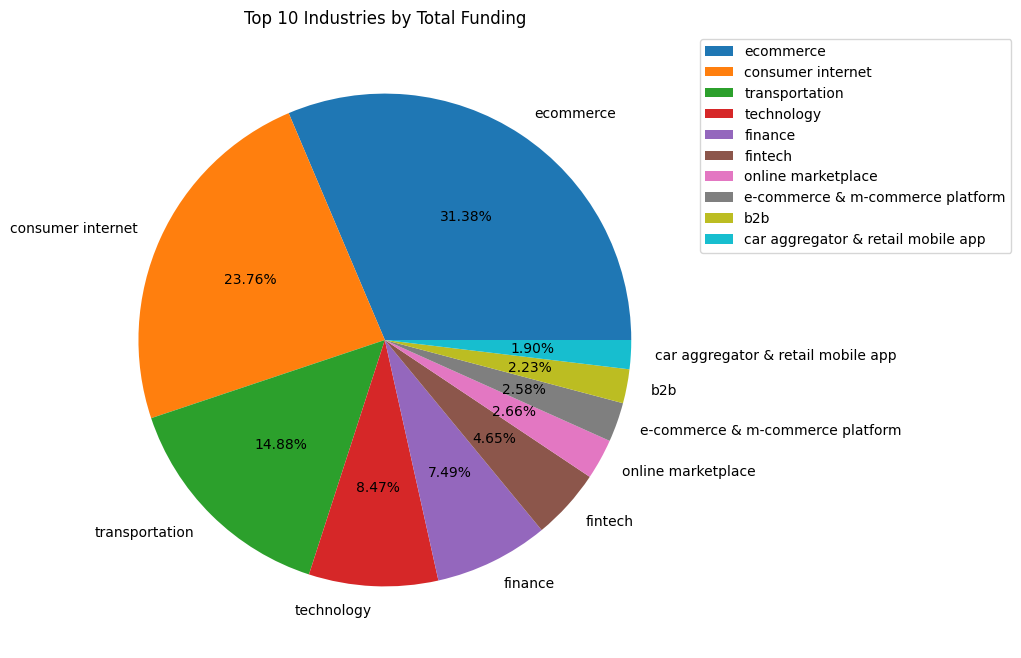

In [26]:
import matplotlib.pyplot as plt

# Group by Industry and sum the funding amounts
industry_data = df.groupby('Industry Vertical')['Amount'].sum().sort_values(ascending=False)
industry_data_top10 = industry_data.head(10)

plt.figure(figsize=(8, 8))
plt.pie(industry_data_top10, labels=industry_data_top10.index, autopct='%1.2f%%')
plt.title("Top 10 Industries by Total Funding")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

📌Conclusion:Ecommerce received the highest funding, followed by Consumer Internet, while Car Aggregators received the least.

##Which cities saw the highest number of funded startups?(Bar Graph)

In [29]:
df['City  Location'] = df['City  Location'].astype(str).str.strip()


df['City  Location'] = df['City  Location'].replace(['', 'nan', 'NaN', 'None', 'Nan'], np.nan)


df = df.dropna(subset=['City  Location'])

df['City  Location'] = df['City  Location'].replace({
    'Banglore': 'Bengaluru',
    'Bangalore': 'Bengaluru',
    'Gurgaon': 'Gurugram'
})
city_counts = df['City  Location'].value_counts().head(10)
print(city_counts)

City  Location
Bengaluru    841
Mumbai       567
New Delhi    421
Gurugram     337
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Ahmedabad     38
Delhi         34
Name: count, dtype: int64


/tmp/ipython-input-29-3594979740.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City  Location'] = df['City  Location'].replace({


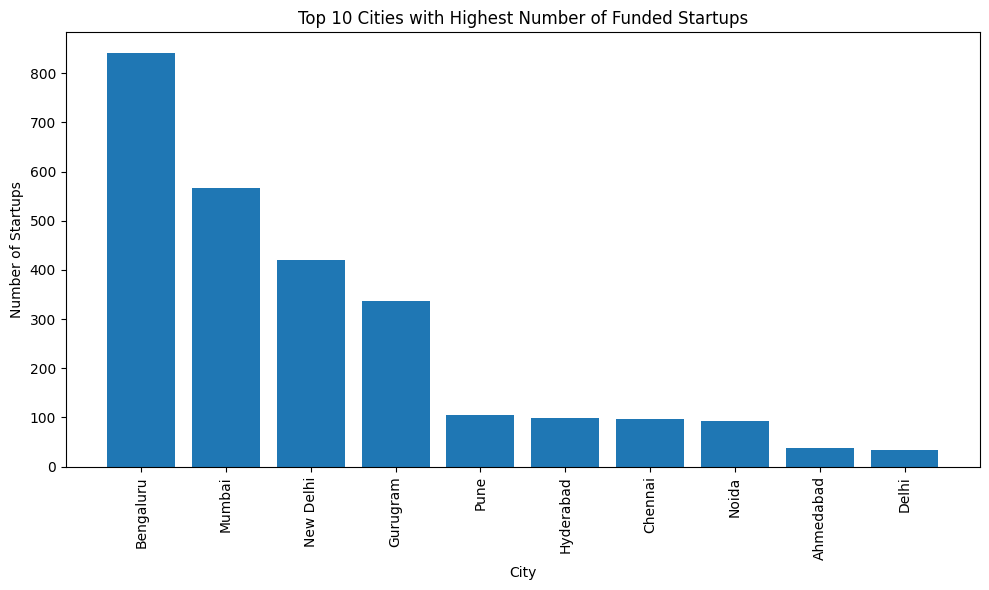

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.title('Top 10 Cities with Highest Number of Funded Startups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📌Conclusion: Bengaluru has highest number of Startups in India.

In [31]:
investment_type_counts = df['InvestmentType'].value_counts().head(10)
print(investment_type_counts)

InvestmentType
Seed Funding            1295
Private Equity          1269
Seed/ Angel Funding       60
Seed / Angel Funding      47
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Series D                  12
Name: count, dtype: int64


##What are the most common funding types?(Bar Graph)

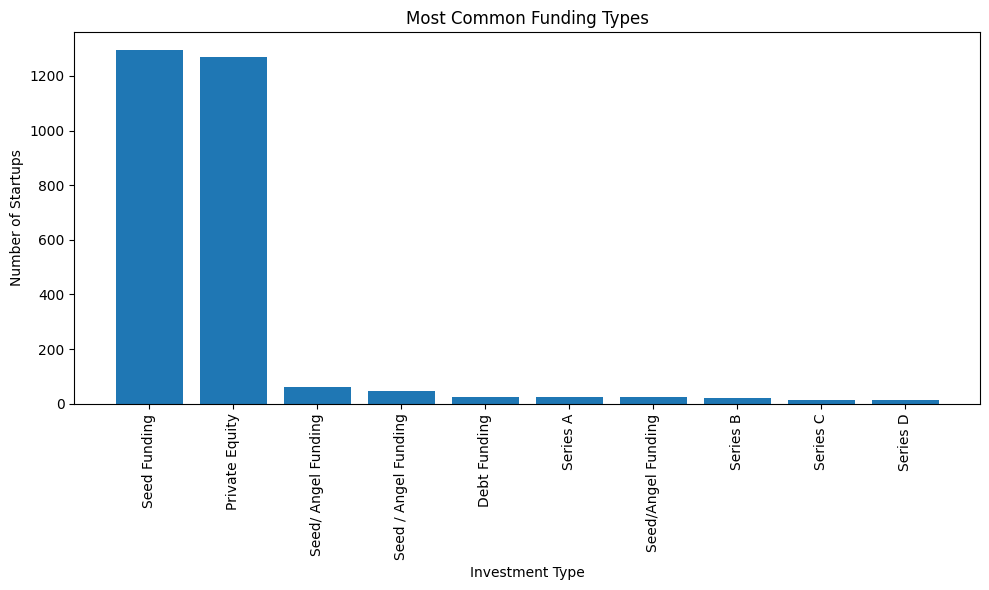

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(investment_type_counts.index, investment_type_counts.values)
plt.xlabel('Investment Type')
plt.ylabel('Number of Startups')
plt.title('Most Common Funding Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📌Conclusion: Most startups were funded through Seed Funding, followed by Private Equity.

##Top 10 Funded Startups(Horizontal Bar Graph)

In [33]:
startup_funding = df.groupby('Startup Name')['Amount'].sum().sort_values(ascending=False).head(10)
print(startup_funding)



Startup Name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.148950e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Flipkart.com        7.000000e+08
Snapdeal            7.000000e+08
Ola Cabs            6.697000e+08
True North          6.000000e+08
BigBasket           5.070000e+08
Name: Amount, dtype: float64


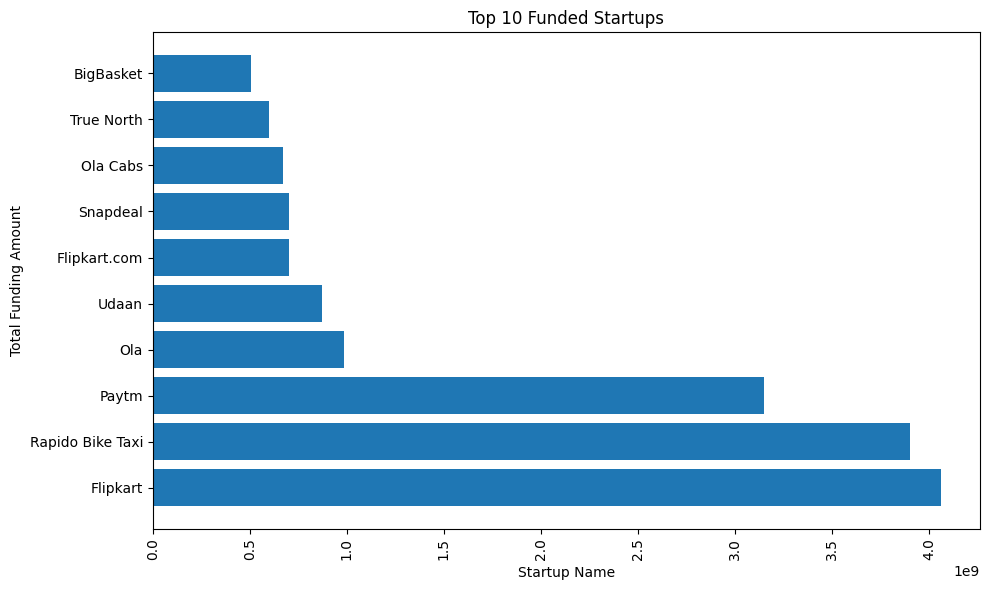

In [49]:
plt.figure(figsize=(10,6))
plt.barh(startup_funding.index,startup_funding.values)
plt.xlabel('Startup Name')
plt.ylabel('Total Funding Amount')
plt.title('Top 10 Funded Startups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📌Conclusion:Flipkart received the highest funding, followed by Rapido.

##City VS Sector Graph(Heatmap)

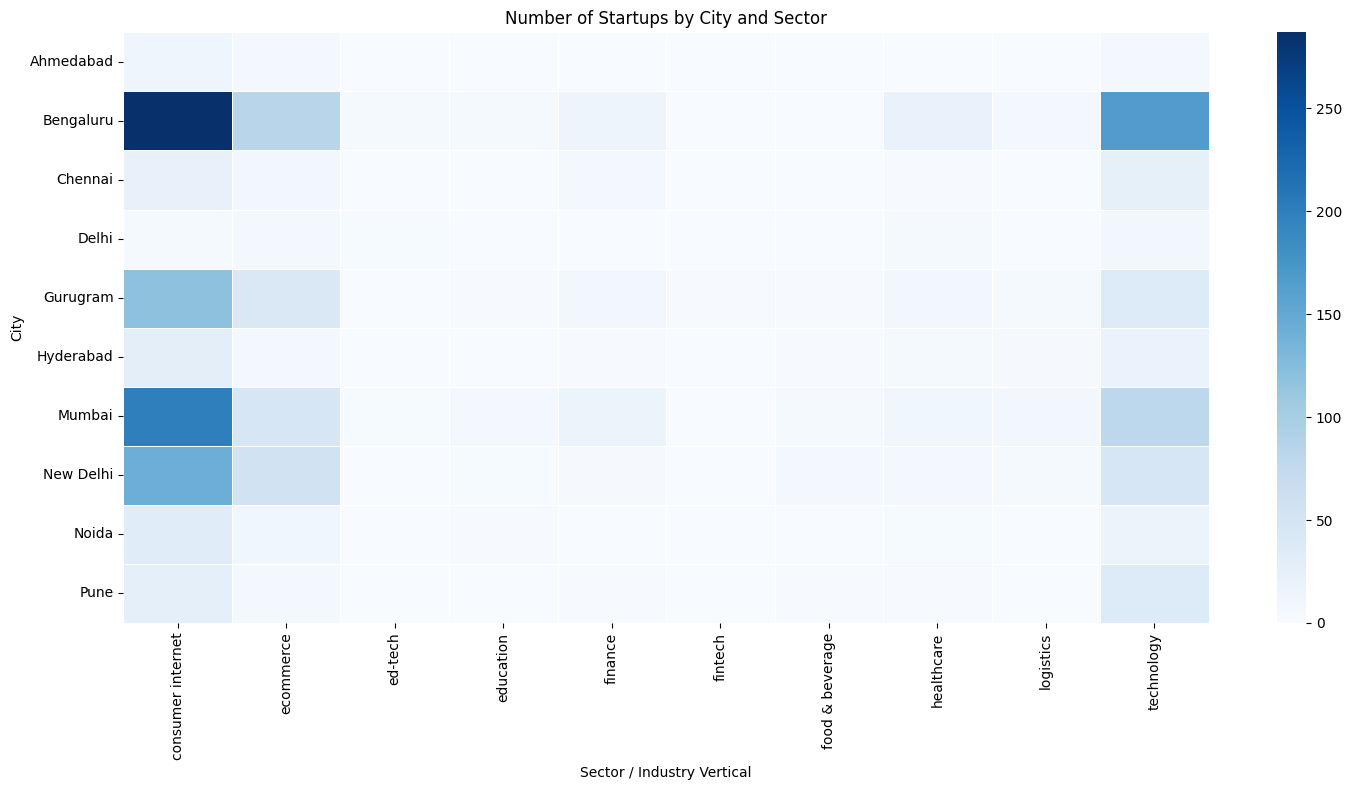

In [38]:
pivot = df.pivot_table(index='City  Location',
                       columns='Industry Vertical',
                       values='Startup Name',
                       aggfunc='count',
                       fill_value=0)
# Filter top cities
top_cities = df['City  Location'].value_counts().nlargest(10).index
top_sectors = df['Industry Vertical'].value_counts().nlargest(10).index

filtered_df = df[df['City  Location'].isin(top_cities) & df['Industry Vertical'].isin(top_sectors)]

pivot = filtered_df.pivot_table(index='City  Location',
                                 columns='Industry Vertical',
                                 values='Startup Name',
                                 aggfunc='count',
                                 fill_value=0)


plt.figure(figsize=(15, 8))
sns.heatmap(pivot, cmap="Blues", annot=False, linewidths=.5)
plt.title("Number of Startups by City and Sector")
plt.xlabel("Sector / Industry Vertical")
plt.ylabel("City")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📌Conclusion:Bengaluru led in the number of startups within the Consumer Internet sector.

In [41]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date dd/mm/yyyy'].dt.year

/tmp/ipython-input-41-1089815744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
/tmp/ipython-input-41-1089815744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date dd/mm/yyyy'].dt.year


##Startup Fundings Over the Years

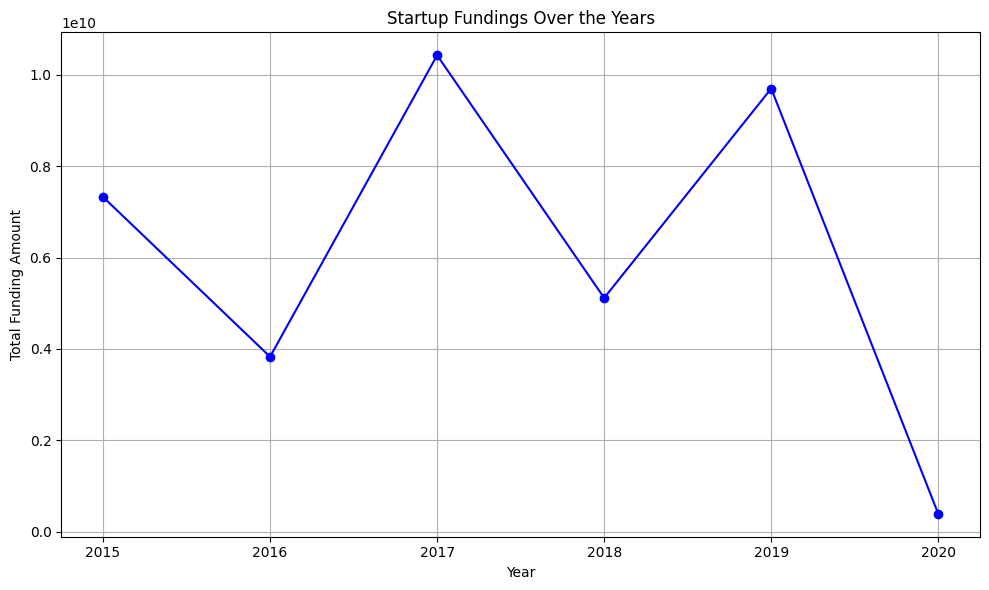

In [63]:
plt.figure(figsize=(10,6))
plt.plot(df.groupby('Year')['Amount'].sum(),color='blue',marker='o')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.title('Startup Fundings Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

📌Conclusion: Startup funding peaked in 2017, showing a strong growth phase, but saw a sharp decline in 2020, likely due to the COVID-19 impact.

##Word Cloud for most frequent Words in Industry Verticals(Sector)

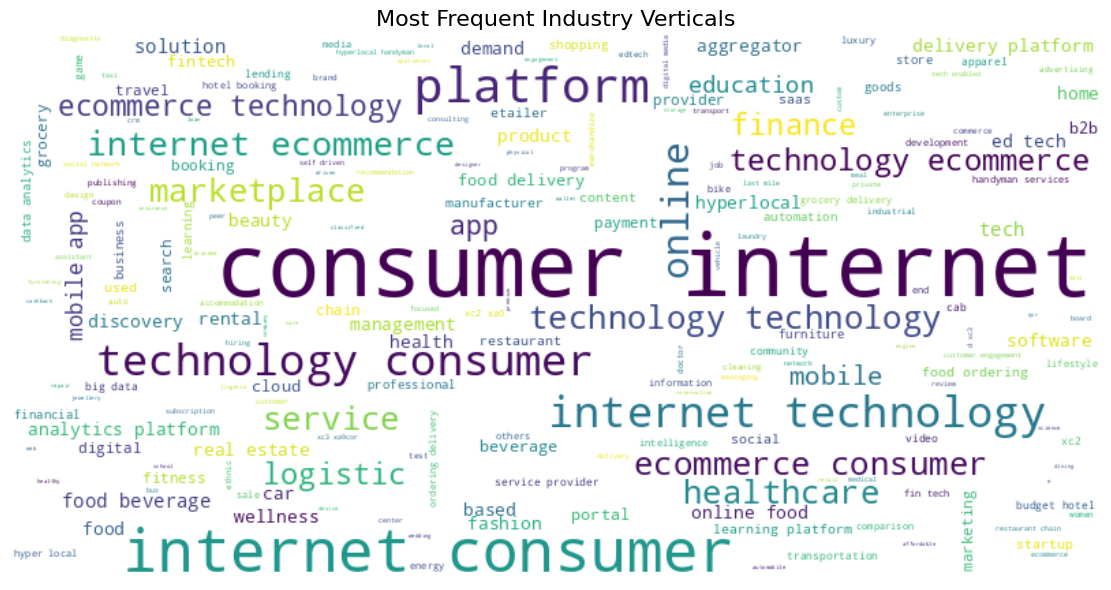

In [71]:
text = ' '.join(df['Industry Vertical'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Industry Verticals', fontsize=16)
plt.tight_layout()
plt.show()

Conclusion:Most startups belong to the Consumer Internet sector.

##📌Key Conclusion


1.2017 saw a startup boom; 2020 saw a dip likely due to COVID.

2.Bengaluru had the most startups, especially in the Consumer Internet sector.

3.Flipkart received the highest funding, followed by Rapido.

4.Seed Funding and Private Equity were the most common funding types.

5.E-commerce attracted the highest funding, while Car Aggregators the least.

6.Consumer Internet had the most number of startups.

7.Word cloud highlights key focus sectors in the startup ecosystem.


